<center><img src="ressources/HSV.png"/></center>

Ce notebook montre l'efficacite du format HSV. Il traite une image où l'on place des pièces de couleurs rouges, sur des cases d'amérique du sud (couleur rougatre).
Avec HSV, on arrive à définir des ranges de couleurs bien définies.

On utilise les fonctions : 
- cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  => Converti de BGR en HSV
- cv2.inRange(img, rangeLow, rangeHigh) => En donnant un couple de range HSV (rangeLow [0,50,50] rangeHigh[9,255,255]), on peut mettre en évidence un couleur (de 0->9 on a la couleur des pièces, 50->255 n'est pratiquement pas un critère). Souvent, la première dimension de HSV suffit à mettre en évidence un couleur, le reste est plutot axé sur la luminance de l'image.

In [1]:
# %%capture
# %pip install opencv-python
# %pip install scikit-image
# %pip install matplotlib

In [2]:
import cv2
import numpy as np
from experiment_zone.plotly_util import displayImages, displayRGBHistogram

In [ ]:
imgRed = cv2.imread("data/gsm/colors_red.jpg")
imgRed = cv2.resize(imgRed, (512,512))
imgRed = cv2.cvtColor(imgRed, cv2.COLOR_BGR2RGB)
imgRed_HSV = cv2.cvtColor(imgRed, cv2.COLOR_RGB2HSV)

images = [(imgRed, "image source", True), (imgRed_HSV, "image HSV", False)]

# !!! on ne peut pas directement afficher une image HSV sur mathplotlib car il fonctionne en RGB
# displayImages(images, (1,2))

array([<Axes: title={'center': 'pieces'}>,
       <Axes: title={'center': 'amerique'}>], dtype=object)

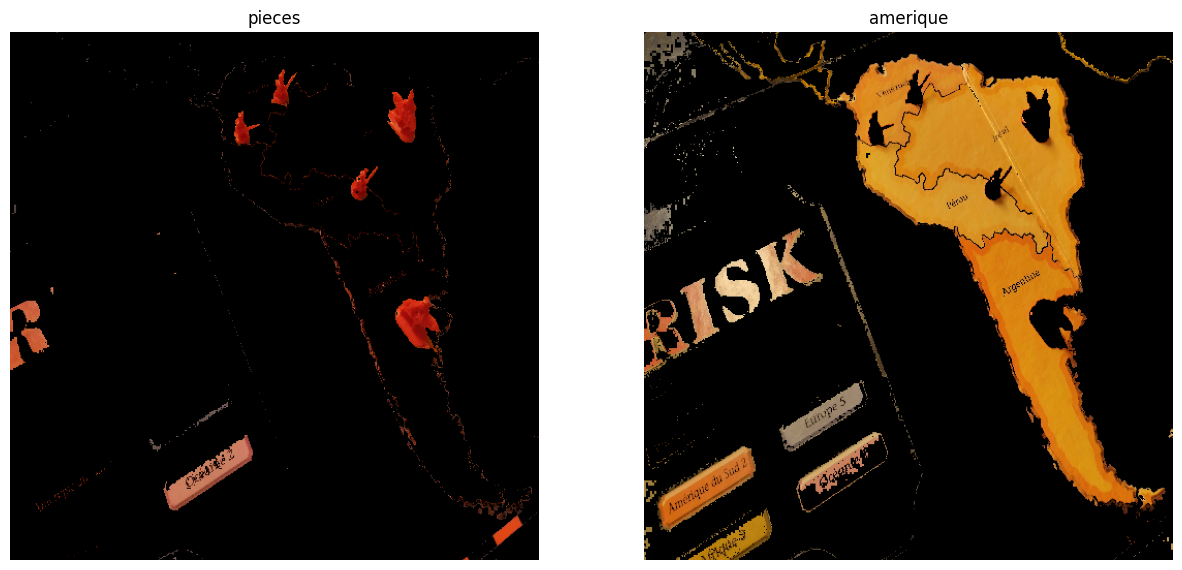

In [5]:
# On crée la range pour les pièces
lower_piece = np.array([0,50,50])
higher_piece = np.array([9,255,255])

# La range pour l'amérique du sud
lower_amerique = np.array([9,50,50])
higher_amerique = np.array([20,255,255])

# On calcule le masque
mask_piece = cv2.inRange(imgRed_HSV, lower_piece, higher_piece)
mask_amerique = cv2.inRange(imgRed_HSV, lower_amerique, higher_amerique)

# On l'applique à l'image RGB
pieces = cv2.bitwise_and(imgRed, imgRed, mask=mask_piece)
amerique = cv2.bitwise_and(imgRed, imgRed, mask=mask_amerique)
masks = [(pieces, "pieces"), (amerique, "amerique")]

# Affichage
displayImages(masks, (1,2))